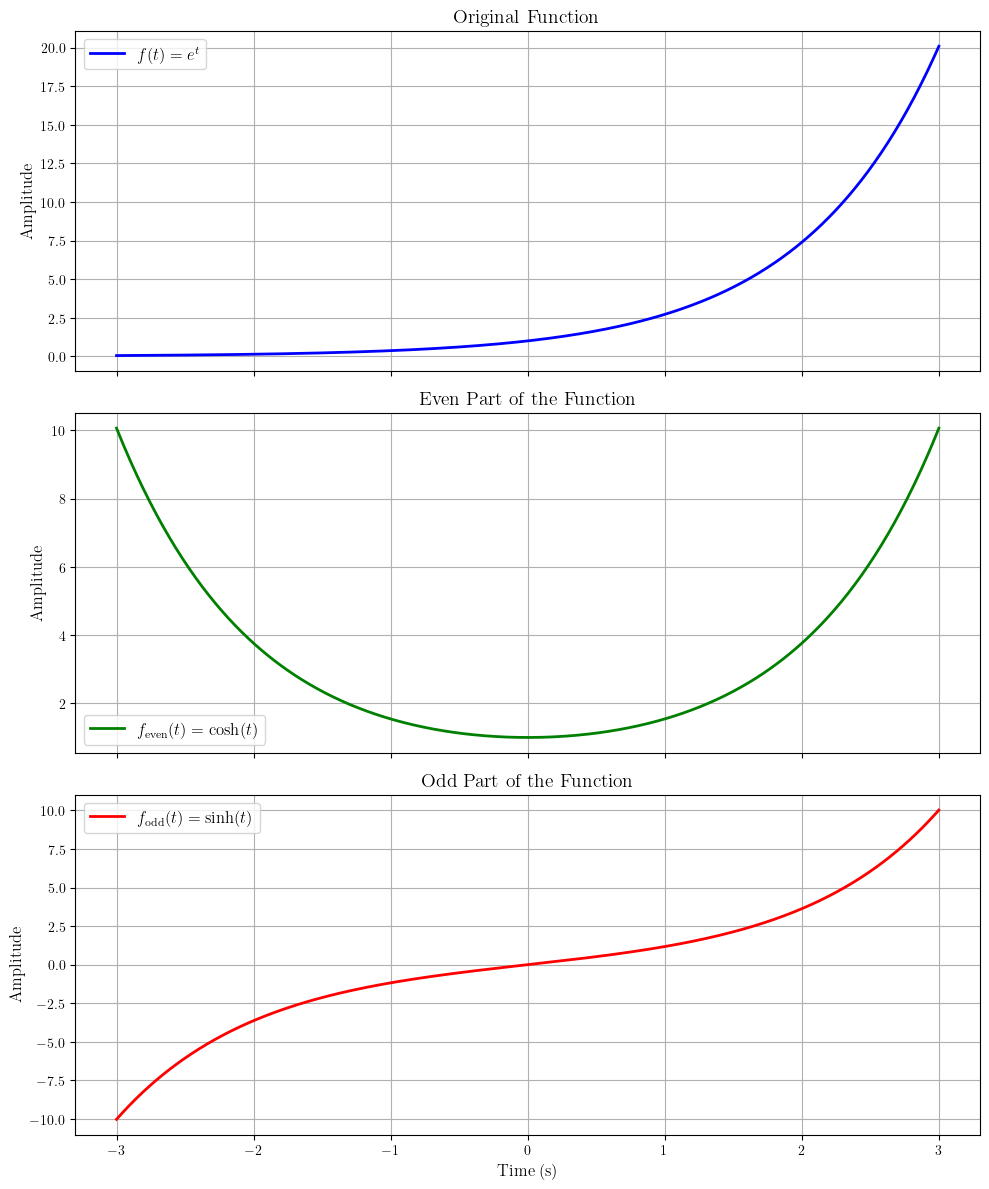

In [6]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
import imageio
from scipy import signal

plt.rcParams.update(
    {
        "text.usetex": True,  # usar LaTeX real
        "font.family": "Fira Code",       # familia general
        "mathtext.fontset": "custom",     # fuente personalizada para fórmulas
        "mathtext.rm": "Fira Code",       # texto “roman”
        "mathtext.it": "Fira Code:italic",# texto itálico
        "mathtext.bf": "Fira Code:bold",   # texto en negrita
        "text.latex.preamble": r"\usepackage{amsmath}",
    }
)

# Time vector
t = np.linspace(-3, 3, 500)

# Define the original function and its components
f_t = np.exp(t)  # Original function: e^t
f_even = (np.exp(t) + np.exp(-t)) / 2  # Even part: cosh(t)
f_odd = (np.exp(t) - np.exp(-t)) / 2  # Odd part: sinh(t)

# Create the subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Plot the original function
axs[0].plot(t, f_t, label=r"$f(t) = e^t$", color="blue", linewidth=2)
axs[0].set_title("Original Function", fontsize=14)
axs[0].set_ylabel("Amplitude", fontsize=12)
axs[0].legend(fontsize=12)
axs[0].grid(True)

# Plot the even part
axs[1].plot(
    t, f_even, label=r"$f_{\text{even}}(t) = \cosh(t)$", color="green", linewidth=2
)
axs[1].set_title("Even Part of the Function", fontsize=14)
axs[1].set_ylabel("Amplitude", fontsize=12)
axs[1].legend(fontsize=12)
axs[1].grid(True)

# Plot the odd part
axs[2].plot(t, f_odd, label=r"$f_{\text{odd}}(t) = \sinh(t)$", color="red", linewidth=2)
axs[2].set_title("Odd Part of the Function", fontsize=14)
axs[2].set_xlabel("Time (s)", fontsize=12)
axs[2].set_ylabel("Amplitude", fontsize=12)
axs[2].legend(fontsize=12)
axs[2].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

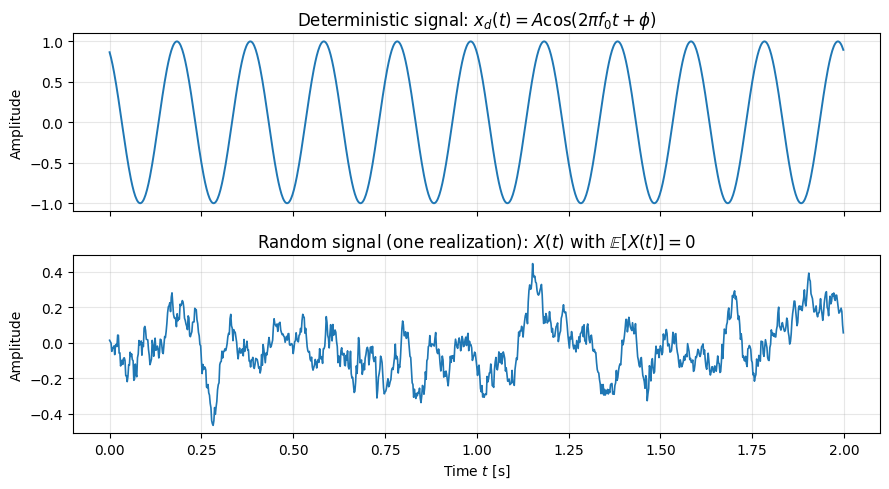

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Time base
np.random.seed(7)
fs = 500  # Hz
T = 2.0  # s
t = np.linspace(0, T, int(fs * T), endpoint=False)

# Deterministic signal: sinusoid
A, f0, phi = 1.0, 5.0, np.pi / 6
x_det = A * np.cos(2 * np.pi * f0 * t + phi)

# Random signal: zero-mean Gaussian sequence, smoothed to be signal-like
noise = np.random.randn(t.size)
M = 25  # moving-average window length (odd)
kernel = np.ones(M) / M
x_rand = np.convolve(noise, kernel, mode="same") * 0.8  # scaled for visibility

# Plot (two panels on a single slide)
fig, axes = plt.subplots(2, 1, figsize=(9, 5), sharex=True)

axes[0].plot(t, x_det, lw=1.4)
axes[0].set_title(r"Deterministic signal: $x_d(t)=A\cos(2\pi f_0 t+\phi)$")
axes[0].set_ylabel("Amplitude")
axes[0].grid(alpha=0.3)

axes[1].plot(t, x_rand, lw=1.2)
axes[1].set_title(r"Random signal (one realization): $X(t)$ with $\mathbb{E}[X(t)]=0$")
axes[1].set_xlabel(r"Time $t$ [s]")
axes[1].set_ylabel("Amplitude")
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()